# SLR FINAL EXAM

### DATA DESCRIPTION: 

The dataset consists of house prices from King County an area in the US State of Washington, this data also covers Seattle. The dataset is a portion of a larger dataset that consisted of 21 variables and 21613 observations.

### ATTRIBUTES: 

1. id=  It is the unique numeric number assigned to each house being sold. 
2. date=  It is the date on which the house was sold out.
3. price= It is the price of house which we have to predict so this is our target variable and aprat from It are our features. 
4. bedrooms= It determines number of bedrooms in a house. 
5. bathrooms= It determines number of bathrooms in a bedroom of a house. 
6. sqft_living= It is the measurement variable which determines the measurement of house in square foot. 
7. sqft_lot= It is also the measurement variable which determines square foot of the lot. 
8. floors= It determines total floors means levels of house. 
9. waterfront= This feature determines whether a house has a view to waterfront 0 means no 1 means yes. 
10. view= It determines the number of viewings the property received.
11. condition= It determines the overall condition of a house on a scale of 1 to 5. 
12. grade=  It determines the overall grade given to the housing unit, based on King County grading system on a scale of 1 to 11 sqft_above= It determines square footage of house apart from basement.
12. sqft_basement= It determines square footage of the basement of the house. 
13. yr_built= It detrmines the date of building of the house. 
14. yr_renovated= It detrmines year of renovation of house. 
15. zipcode= It determines the zipcode of the location of the house. 
16. lat= It determines the latitude of the location of the house. 
17. long= It determines the longitude of the location of the house. 
18. sqft_living15= Living room area in 2015(implies-- some renovations) 
19. sqft_lot15= lotSize area in 2015(implies-- some renovations) 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression,SGDRegressor,ElasticNet
from mlxtend.feature_selection import SequentialFeatureSelector

from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings("ignore")


### 1.	 Read the dataset (tab, csv, xls, txt, inbuilt dataset) 

In [ ]:
## Kindly change the below cells from markdown to code and execute it 

In [4]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)

df=pd.read_csv("data_set.csv")

df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,2068000270,20140805T000000,1400000.0,5,3.0,3850,14990,1.0,0,0,4,9,2290,1560,1964,0,98004,47.6425,-122.218,3010,15001
1,7732500700,20141126T000000,832500.0,4,2.5,3450,35100,2.0,0,0,3,10,3450,0,1987,0,98052,47.7302,-122.106,3110,35894
2,7851990240,20140717T000000,771150.0,4,3.5,3950,12320,2.0,0,0,3,10,3950,0,2001,0,98065,47.5414,-121.869,3920,11086
3,3423049269,20140513T000000,225000.0,4,1.5,1950,12559,1.5,0,0,3,6,1950,0,1939,0,98188,47.4364,-122.282,1950,9178
4,7852150200,20140923T000000,389950.0,3,2.5,1700,6396,2.0,0,0,3,7,1700,0,2003,0,98065,47.5333,-121.870,1700,4444


### 2.	Summarize important observations from the data set (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	What are the number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [6]:
#(a)
df.shape
# There are 2001 rows and 21 columns

(2001, 21)

In [9]:
df.dtypes
# There are 15 columns of int64 data type
# There are 5 columns of float64 datatype
# There is one column of object datatype

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
#(b)
df.describe().T
# Below is the 5 point summary for the data which gives the mean,standard deviation,min,max and 25%,50% and 75% data values

,count,mean,std,min,25%,50%,75%,max
id,2001.0,4.590975e+09,2.888947e+09,1.120040e+07,2.114700e+09,3.971701e+09,7.346600e+09,9.839301e+09
price,2001.0,5.296417e+05,3.438551e+05,8.650000e+04,3.170000e+05,4.500000e+05,6.295000e+05,4.210000e+06
bedrooms,2001.0,3.347326e+00,9.059824e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,1.000000e+01
bathrooms,2001.0,2.036982e+00,7.535792e-01,5.000000e-01,1.500000e+00,2.000000e+00,2.500000e+00,8.000000e+00
sqft_living,2001.0,2.037556e+03,8.962796e+02,4.700000e+02,1.410000e+03,1.890000e+03,2.470000e+03,1.354000e+04
sqft_lot,2001.0,1.784646e+04,4.721811e+04,8.440000e+02,5.478000e+03,7.919000e+03,1.108500e+04,7.156900e+05
floors,2001.0,1.423788e+00,5.013121e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00
waterfront,2001.0,4.997501e-03,7.053377e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,2001.0,2.503748e-01,8.079487e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,2001.0,3.449775e+00,6.786761e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [16]:
#(c)
for i in df.select_dtypes(include = "object").columns:
    count = df.select_dtypes(include = "object")[i].value_counts()
    percentage = count/len(df)
    print(count)
    print(percentage)
# date column is of object datatype
# There is only one categorical column

20150325T000000    18
20150423T000000    18
20150402T000000    16
20140923T000000    15
20141201T000000    15
                   ..
20150131T000000     1
20150509T000000     1
20140927T000000     1
20150113T000000     1
20140608T000000     1
Name: date, Length: 310, dtype: int64
20150325T000000    0.008996
20150423T000000    0.008996
20150402T000000    0.007996
20140923T000000    0.007496
20141201T000000    0.007496
                     ...   
20150131T000000    0.000500
20150509T000000    0.000500
20140927T000000    0.000500
20150113T000000    0.000500
20140608T000000    0.000500
Name: date, Length: 310, dtype: float64


### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects (5 Marks)

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the data normally distributed? Is it a defect? Why or why not? 


In [18]:
#(a)
df.isnull().sum()
# Variables have no missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

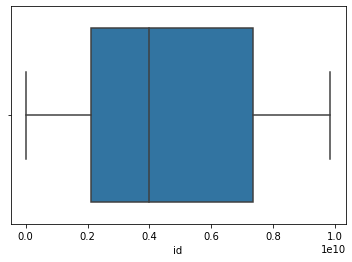

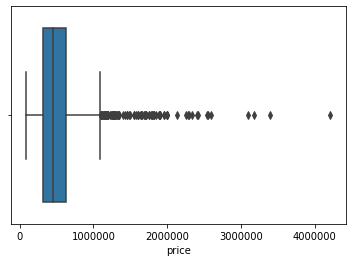

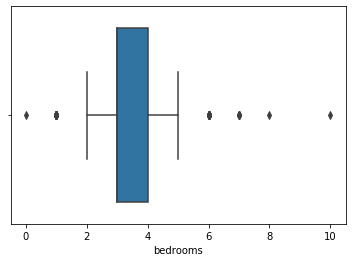

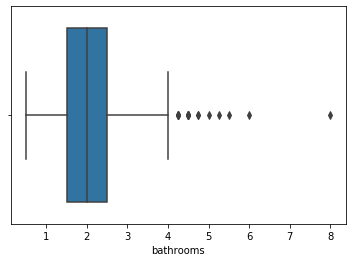

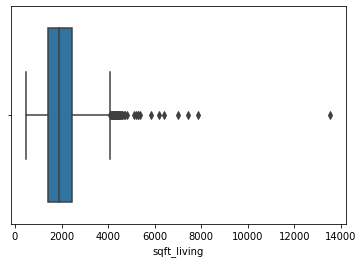

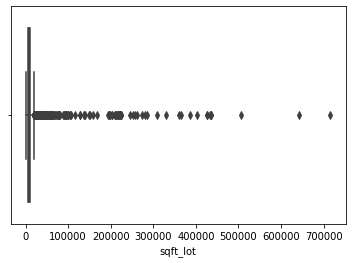

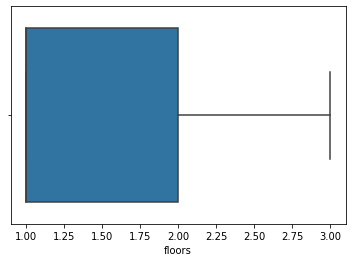

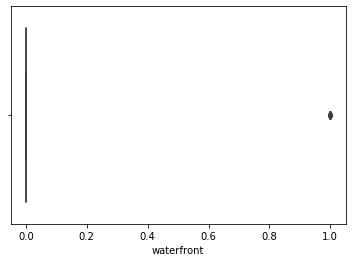

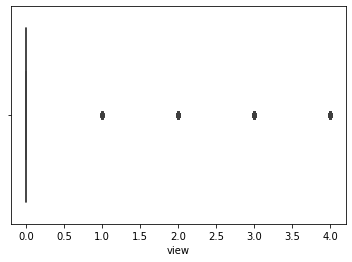

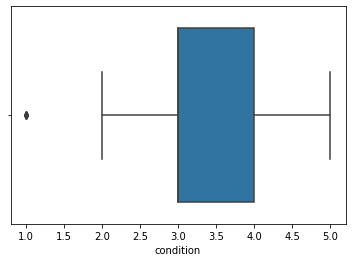

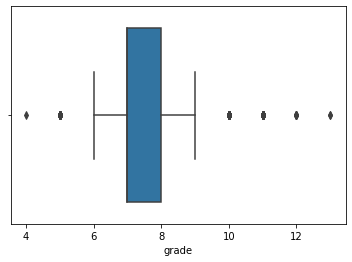

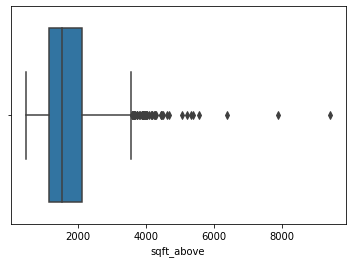

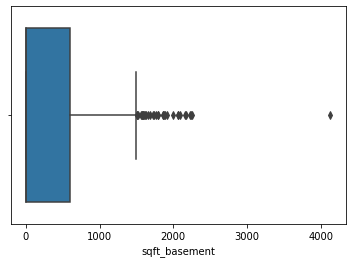

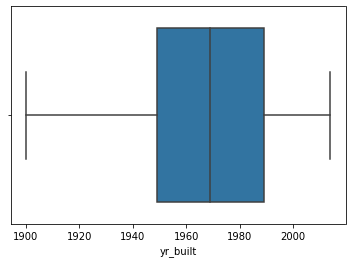

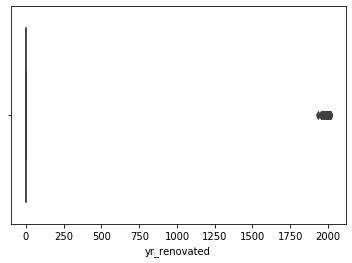

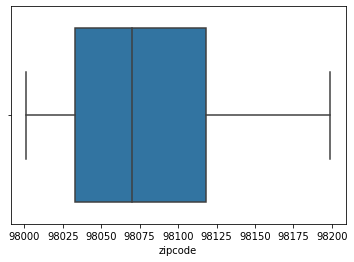

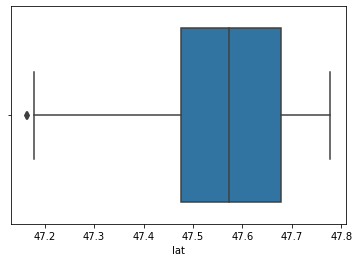

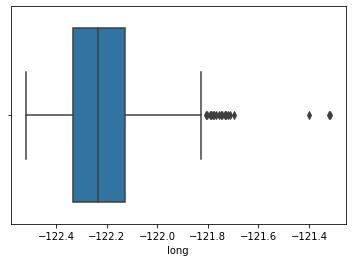

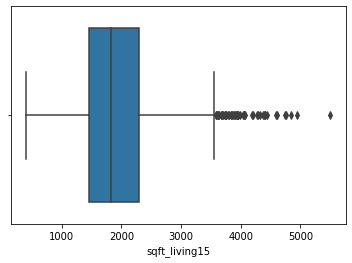

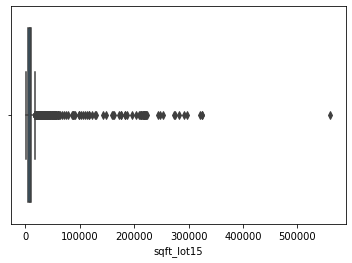

In [22]:
#(b)
for i in df.select_dtypes(include = np.number).columns:
    sns.boxplot(x=df.select_dtypes(include = np.number)[i])
    plt.show()
# Price,bedrooms,Bathrooms,sqft_living,sqft_lot,waterfront,view,condition,grade,,sqft_above,Sqft_basement,yr_renovated,la t,
# long,sqft_living15,sqft_lot15
# These columns have outliers

In [153]:
#(c)
# to check whether the data is normally distributed we can consider Shapiro test or can visualize using distplot
# H0: Data is normal
# H1: Data is not normal
test_stat,p_value = stats.shapiro(df.select_dtypes(include=np.number))
print("P-value:",p_value)

# Considering sl as 0.05 as industry standards
# p_value<sl that means we failed to reject H0
#  So Data is normal
# It is not a defect

P-value: 0.0


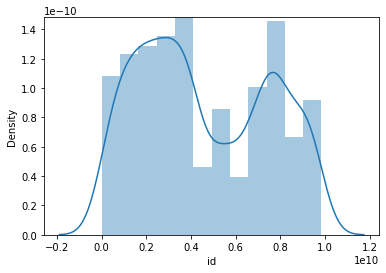

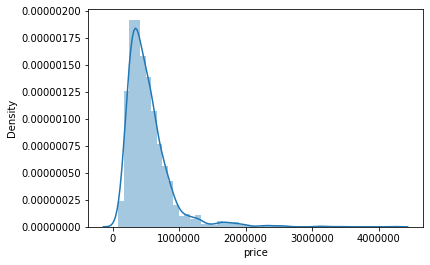

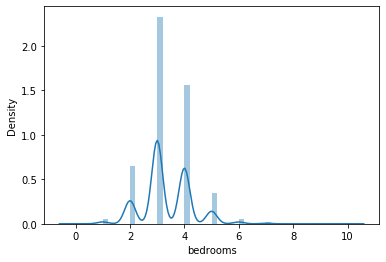

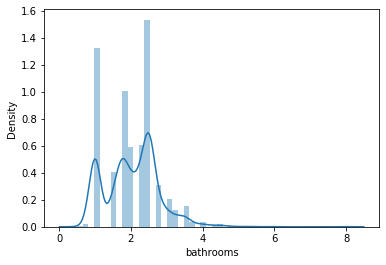

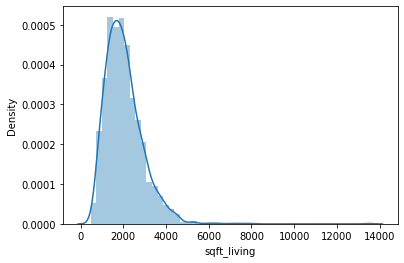

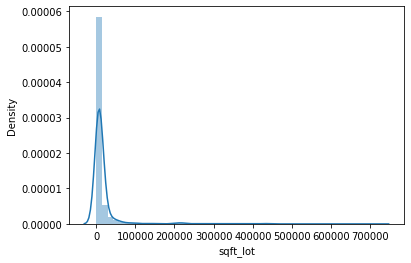

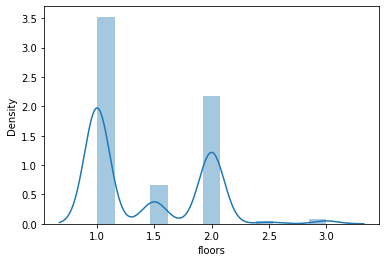

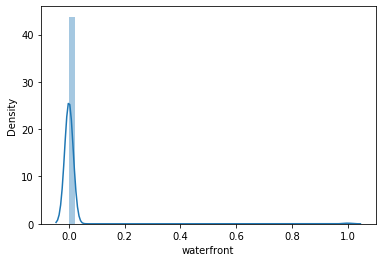

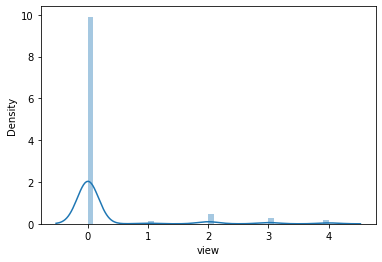

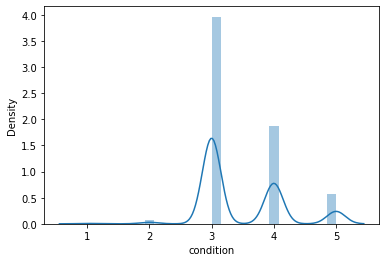

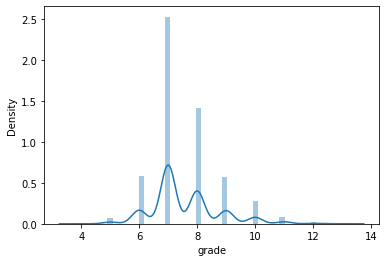

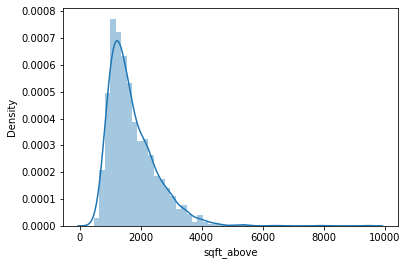

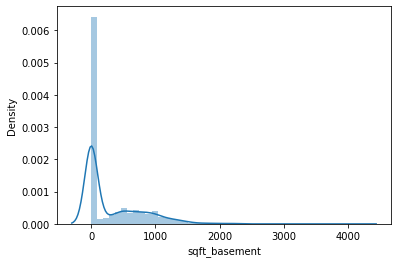

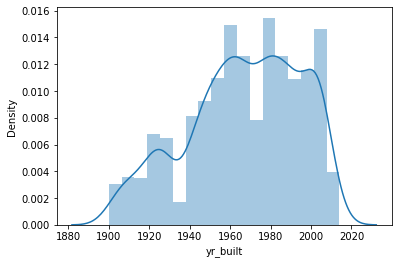

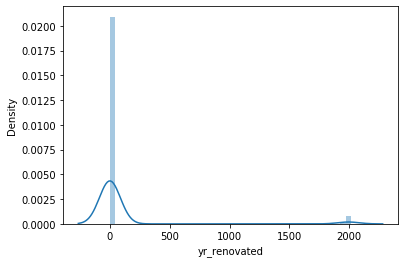

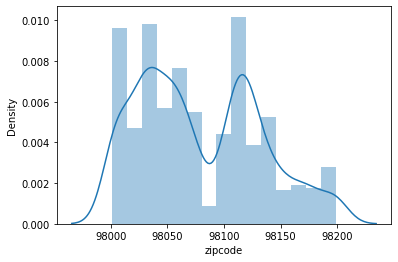

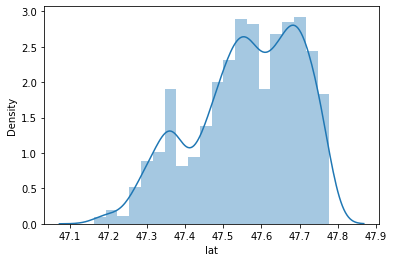

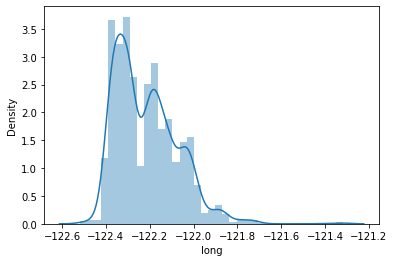

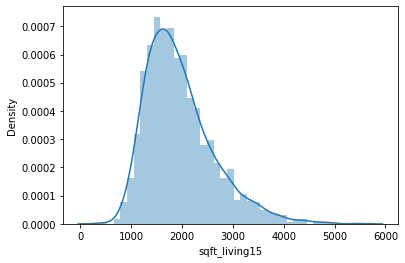

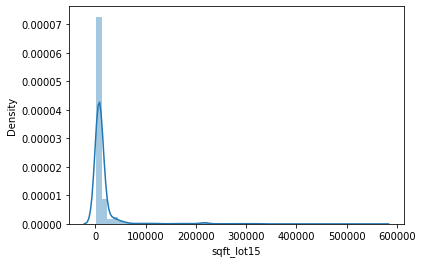

In [29]:
for i in df.select_dtypes(include = np.number).columns:
    sns.distplot(df.select_dtypes(include = np.number)[i])
    plt.show()
# not considering id column as it is not significant variable
# Price column,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,
# sqft_living15 and sqft_lot15 are rightly skewed
# Even thought bedrooms, bathrooms,view,condition,grade and floors column is numerical it has categorical data

### 4.	Summarize relationships among variables (10 marks)  

a.	Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

b.	Plot all independent variables with the target. Are all relationships linear? If not, what steps would you take based on this information?

 Hint: based on your observations you may want to transform features or create additional features.


In [156]:
#(a)
correlation_matrix = df.select_dtypes(include = np.number).corr()
correlation_matrix["price"].sort_values(ascending=False)
# sqft_living,grade,sqft_living15,sqft_above,bathrooms,view,bedrooms,sqft_basement,lat,floors,waterfront,yr_renovated
# are highly correlated with the target variable
# sqft_lot,sqft_lot15,condition,yr_built,long,id,zipcode are less correlated with Target Variable
# We can remove,id,zipcode columns
# We can even check vif to find out the significant variables and remove insignificant variables

price            1.000000
sqft_living      0.693570
grade            0.675054
sqft_living15    0.614563
sqft_above       0.594231
bathrooms        0.517674
view             0.398075
bedrooms         0.331617
sqft_basement    0.331357
lat              0.300058
floors           0.267197
waterfront       0.175390
yr_renovated     0.111798
sqft_lot         0.071116
sqft_lot15       0.060202
condition        0.058436
yr_built         0.057273
long             0.022758
id              -0.046016
zipcode         -0.067168
Name: price, dtype: float64

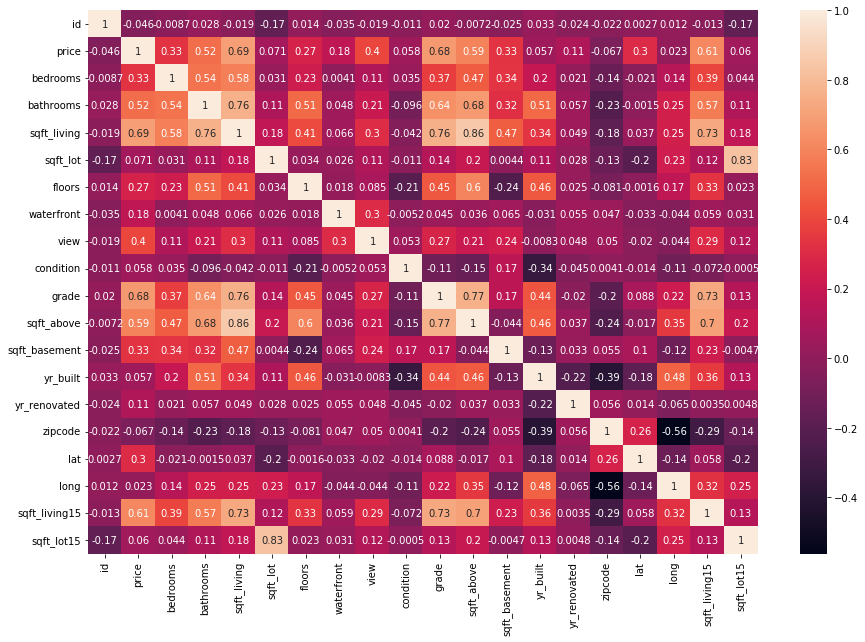

In [158]:
plt.figure(figsize = (15,10))
sns.heatmap(correlation_matrix,annot=True)

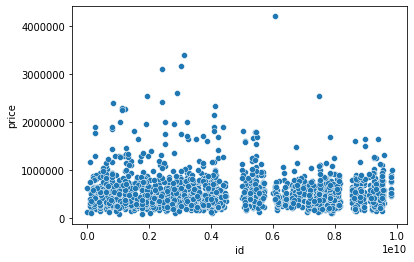

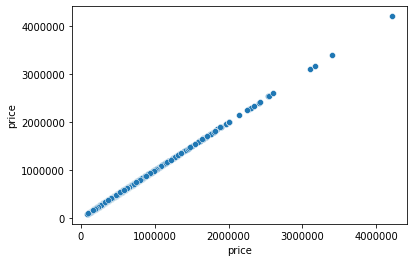

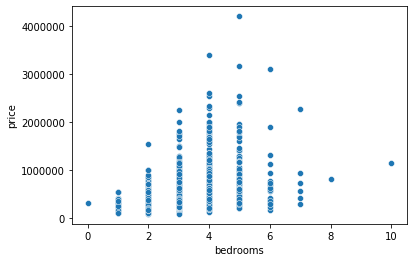

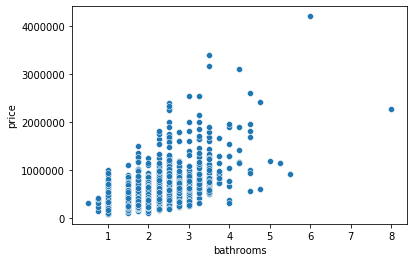

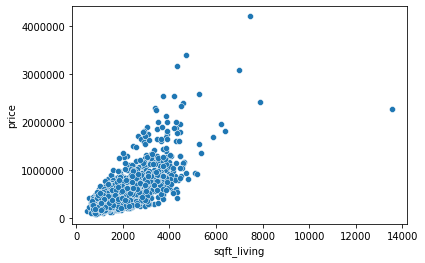

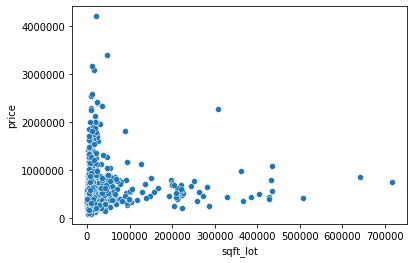

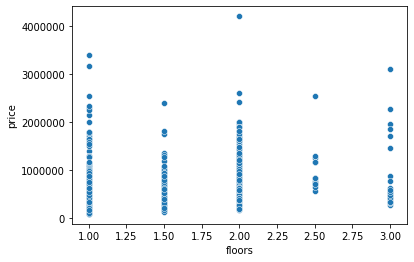

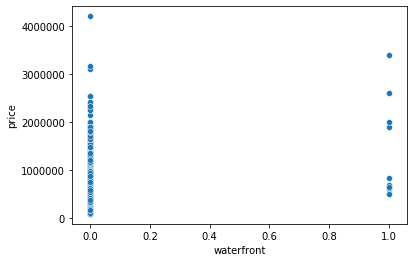

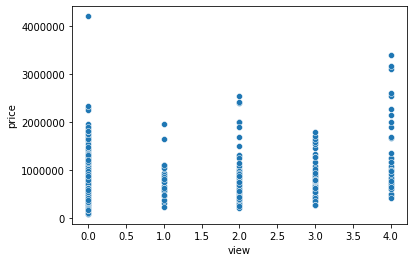

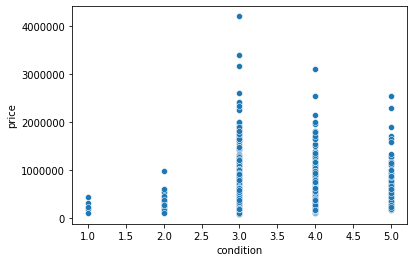

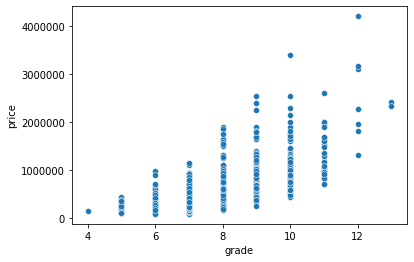

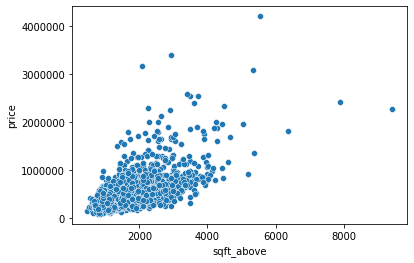

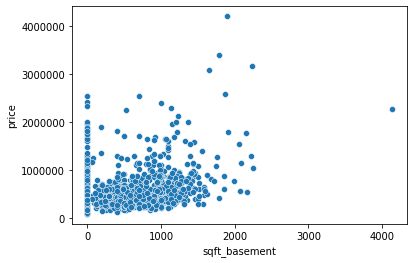

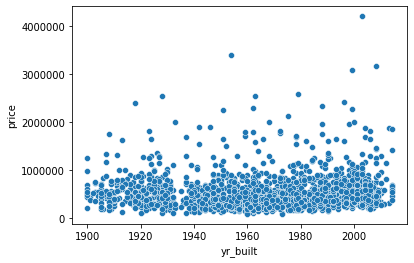

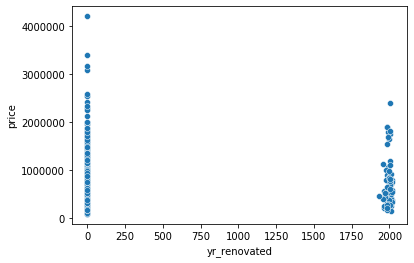

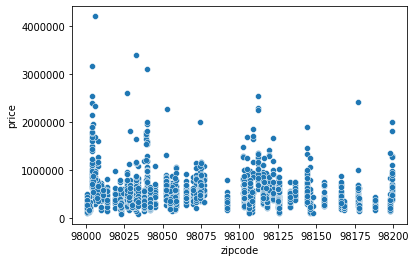

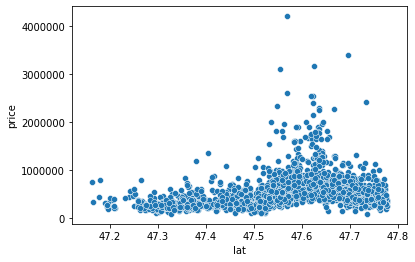

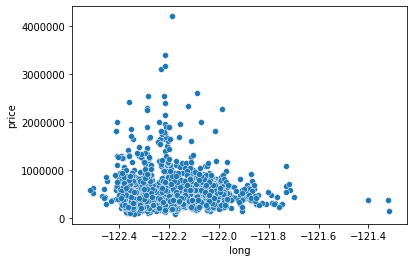

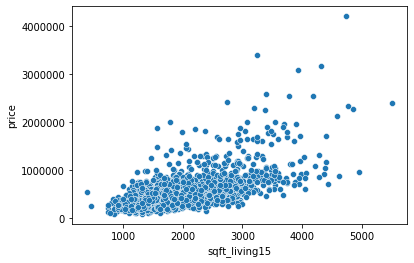

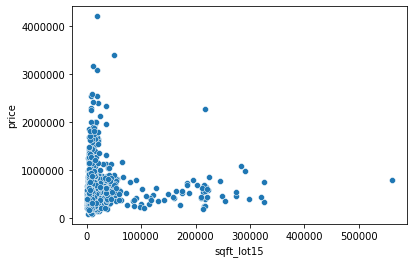

In [35]:
#(b)
for i in df.select_dtypes(include = np.number).columns:
    sns.scatterplot(x=df.select_dtypes(include = np.number)[i],y=df["price"])
    plt.show()
# sqft_living,sqft_above has linear relationship and the rest of the columns are not linear 
# and don't have linear relationship with price
# So we assume that they are linear and perform the model

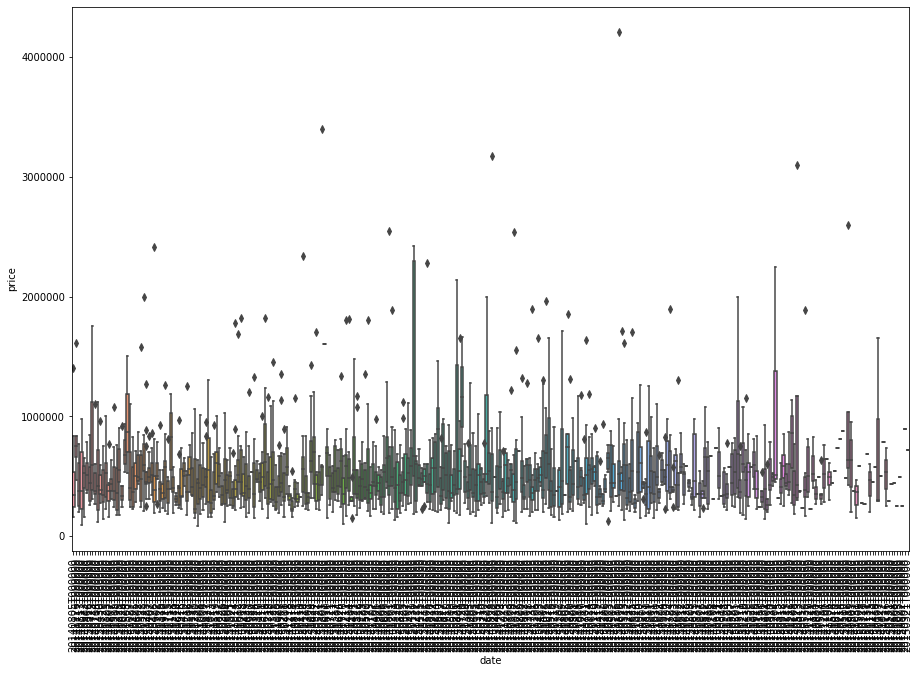

In [43]:
for i in df.select_dtypes(include = "object").columns:
    plt.figure(figsize = (15,10))
    sns.boxplot(x=df.select_dtypes(include = "object")[i],y=df["price"])
    plt.xticks(rotation=90)
    plt.show()

### 5.	Split dataset into train and test (70:30) (5 marks)

a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [159]:
#(a)
x = df.drop(columns=["id","zipcode","date"],axis = 1)
y = df["price"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

In [160]:
test_stat_train,p_value_train = stats.ttest_1samp(a=ytrain,popmean = ytrain.mean())
print(p_value)

0.0


In [161]:
test_stat_train,p_value_train = stats.ttest_1samp(a=ytest,popmean = ytest.mean())
print(p_value)

0.0


In [162]:
# Train and test data are not the representative of overall data, and it is proved statistically by calculating p_value of
# ytrain and ytest
# Train and test data are splitted 70 and 30 percent respectively

### 6.	Fit a base model. Please write your key observations (15 marks) 

a.	What is the overall R2? Please comment on whether it is good or not.

b.	What is the adjusted R2? Is it different from R2? Why?

c.	Which variables are significant?

d.	Is there multicollinearity?

e.	Which other key model output parameters do you want to look at? 


In [163]:
# Base model
x = df.drop(columns=["id","zipcode","date"],axis = 1)
y = df["price"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
LR = LinearRegression()
LR.fit(xtrain,ytrain)
train_pred = LR.predict(xtrain)
test_pred = LR.predict(xtest)
print("Mean Squared Error train:",mean_squared_error(ytrain,train_pred))
print("Mean Squared Error test:",mean_squared_error(ytest,test_pred))
print("Mean absolute Error train:",mean_absolute_error(ytrain,train_pred))
print("Mean absolute Error test:",mean_absolute_error(ytest,test_pred))
print("Mean absolute percentage Error train:",mean_absolute_percentage_error(ytrain,train_pred))
print("Mean absolute percentage Error test:",mean_absolute_percentage_error(ytest,test_pred))
print("r2 train:",r2_score(ytrain,train_pred))
print("r2 test:",r2_score(ytest,test_pred))
print("adjusted r2 train:",1-(1-r2_score(ytrain,train_pred))*(len(ytrain)-1)/(len(ytrain)-1-1))
print("adjusted r2 test:",1-(1-r2_score(ytest,test_pred))*(len(ytest)-1)/(len(ytest)-1-1))
print("rmse train:",rmse(ytrain,train_pred))
print("rmse test:",rmse(ytest,test_pred))

Mean Squared Error train: 1.1949577805743418e-19
Mean Squared Error test: 1.6047469044383158e-19
Mean absolute Error train: 2.6162264735570975e-10
Mean absolute Error test: 2.85420926309465e-10
Mean absolute percentage Error train: 6.959330194882794e-16
Mean absolute percentage Error test: 7.286746122183859e-16
r2 train: 1.0
r2 test: 1.0
adjusted r2 train: 1.0
adjusted r2 test: 1.0
rmse train: 3.456816137104115e-10
rmse test: 4.0059292360678513e-10


In [164]:
#(a)
print("r2 train:",r2_score(ytrain,train_pred))
print("r2 test:",r2_score(ytest,test_pred))
# R2 is known as the explained variance
# The overall r2 for the base model is 1.0
# The r2 for train is 1
# The r2 for test is 1
# There is no difference in the r2 for train and test data
# More the r2 score the good is the model
# r2 score close to one or equal to one predicts that the model performance is good
# r2 score explains the variability of the model
# that means how much area occupied by the model
# if r2 score is 1 than it means that the area occupied is 100 percent and all the data points are captured
# if r2 score is less than the model is not performing good

r2 train: 1.0
r2 test: 1.0


In [165]:
#(b)
print("adjusted r2 train:",1-(1-r2_score(ytrain,train_pred))*(len(ytrain)-1)/(len(ytrain)-1-1))
print("adjusted r2 test:",1-(1-r2_score(ytest,test_pred))*(len(ytest)-1)/(len(ytest)-1-1))
# adjusted r2 score is different from r2 score
# adjusted r2 score is also helpful for variance explanation
# but the major difference is it considers the significant variables and gives us the r2 score
# where as r2 score fails to capture the significant variables and considers all the variables irrespective of significant 
# and insignificant
# In our base model the overall adjusted r2 score is 1
# For train data the adjusted r2 score is 1
# For test data the adjusted r2 score is 1
# There is no significant difference in train and test data adjusted r2 score
# Base on the r2 score we can say that model is performing good

adjusted r2 train: 1.0
adjusted r2 test: 1.0


In [166]:
#(c)
xtrain_c = sm.add_constant(xtrain)
ols = sm.OLS(ytrain,xtrain_c)
ols_model = ols.fit()
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.295e+31
Date:                Tue, 04 Jun 2024   Prob (F-statistic):               0.00
Time:                        06:26:50   Log-Likelihood:                 27746.
No. Observations:                1400   AIC:                        -5.546e+04
Df Residuals:                    1382   BIC:                        -5.536e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           1.77e-08   1.94e-08      0.912      0.362   -2.04e-08    5.57e-08
price             1.0000    9.3e-17   1.07e+16      0.000       1.000       1.000
bedrooms       2.638e-11   2.24e-11      1.177      0.239   -1.76e-11    7.03e-11
bathrooms     -2.547e-11   3.94e-11     -0.647      0.518   -1.03e-10    5.18e-11
sqft_living    -9.77e-15    2.9e-14     -0.337      0.736   -6.67e-14    4.71e-14
sqft_lot      -8.882e-16   6.18e-16     -1.436      0.151    -2.1e-15    3.25e-16
floors         2.183e-11   4.58e-11      0.477      0.634    -6.8e-11    1.12e-10
waterfront     6.112e-10   2.63e-10      2.326      0.020    9.57e-11    1.13e-09
view                   0   2.38e-11          0      1.000   -4.67e-11    4.67e-11
condition     -4.275e-11   2.65e-11     -1.613      0.107   -9.47e-11    9.24e-12
grade          7.276e-12   2.72e-11      0.268      0.789   -4.61e-11    6.06e-11
sqft_above    -2.132e-14   2.86e-14     -0.745      0.457   -7.75e-14    3.48e-14
sqft_basement  2.132e-14   3.11e-14      0.685      0.493   -3.97e-14    8.23e-14
yr_built      -7.958e-13   9.23e-13     -0.862      0.389   -2.61e-12    1.02e-12
yr_renovated  -2.487e-14   4.41e-14     -0.563      0.573   -1.11e-13    6.17e-14
lat           -1.091e-10   1.36e-10     -0.802      0.422   -3.76e-10    1.58e-10
long           8.549e-11   1.42e-10      0.604      0.546   -1.92e-10    3.63e-10
sqft_living15 -3.197e-14   3.96e-14     -0.807      0.420    -1.1e-13    4.58e-14
sqft_lot15     3.053e-16   8.15e-16      0.374      0.708   -1.29e-15     1.9e-15
==============================================================================
Omnibus:                     1364.550   Durbin-Watson:                   0.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            91741.030
Skew:                          -4.450   Prob(JB):                         0.00
Kurtosis:                      41.646   Cond. No.                     3.39e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.63e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [167]:
# From the above summary we can conclude that those variables where p>0.05 are considered to be significant variables
# 'bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors','view', 'condition', 'grade',
#'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode','lat', 'long', 'sqft_living15', 'sqft_lot15'
# are considered to be significant variables

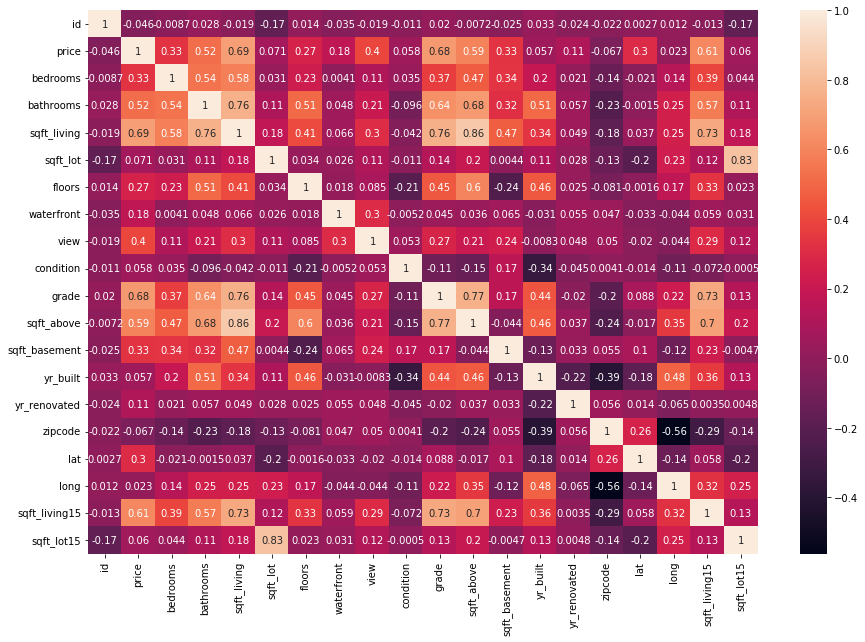

In [168]:
# (d)
plt.figure(figsize = (15,10))
sns.heatmap(df.select_dtypes(include = np.number).corr(),annot = True)
# Multicollinearity is there if there is any correlation existing between the independent variables
# We can even perform vif method to find the multicollinearity

In [74]:
vif = [variance_inflation_factor(df.select_dtypes(include=np.number).values,i) for i in range(df.select_dtypes(include=np.number).shape[1])]
vif_df = pd.DataFrame({"Features":df.select_dtypes(include=np.number).columns,"VIF":vif})
vif_df

,Features,VIF
0,id,3.699205
1,price,3.320716
2,bedrooms,1.663489
3,bathrooms,3.438814
4,sqft_living,inf
5,sqft_lot,3.273709
6,floors,1.999391
7,waterfront,1.133633
8,view,1.363010
9,condition,1.194869


In [75]:
# From the above table we can say that the columns whose VIF is condeidered to be greater than 1 
# are having multicollinearity

In [77]:
#(e)
# The other key model parameters we can consider apart from r2 score and adjusted r2 score
# We can consider mean squared error,mean absolute error, mean absolute percentage error and mean squared error
print("Mean Squared Error train:",mean_squared_error(ytrain,train_pred))
print("Mean Squared Error test:",mean_squared_error(ytest,test_pred))
print("Mean absolute Error train:",mean_absolute_error(ytrain,train_pred))
print("Mean absolute Error test:",mean_absolute_error(ytest,test_pred))
print("Mean absolute percentage Error train:",mean_absolute_percentage_error(ytrain,train_pred))
print("Mean absolute percentage Error test:",mean_absolute_percentage_error(ytest,test_pred))
print("rmse train:",rmse(ytrain,train_pred))
print("rmse test:",rmse(ytest,test_pred))
# Lower the rmse, mse,mae,mape the best is the model

Mean Squared Error train: 1.1949577805743418e-19
Mean Squared Error test: 1.6047469044383158e-19
Mean absolute Error train: 2.6162264735570975e-10
Mean absolute Error test: 2.85420926309465e-10
Mean absolute percentage Error train: 6.959330194882794e-16
Mean absolute percentage Error test: 7.286746122183859e-16
rmse train: 3.456816137104115e-10
rmse test: 4.0059292360678513e-10


### 7.	How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model. (20 marks)
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 


In [169]:
# The accuracy of the model can be improved by performing different models and check
# Cross val score
# Standard SCalar
# Forward Selection
# elasticnet
# SGD Regressor

In [179]:
# Cross Val Score

x = df.drop(columns=["id","zipcode","date"],axis = 1)
y = df["price"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

LR = LinearRegression()
cross_r2 = cross_val_score(estimator = LR, X = x, y = y,scoring = "r2",cv = 3)
print("r2 score:",cross_r2.mean())

# The R2 score value we got is 1 which means it has high explainability Variance

r2 score: 1.0


In [171]:
# Standard Scalar

ss= StandardScaler()
x = df.drop(columns=["id","zipcode","date"],axis = 1)
y = df["price"]
x = ss.fit_transform(x)
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)

LR = LinearRegression()
LR.fit(xtrain,ytrain)
train_pred = LR.predict(xtrain)
test_pred = LR.predict(xtest)
print("Mean Squared Error train:",mean_squared_error(ytrain,train_pred))
print("Mean Squared Error test:",mean_squared_error(ytest,test_pred))
print("Mean absolute Error train:",mean_absolute_error(ytrain,train_pred))
print("Mean absolute Error test:",mean_absolute_error(ytest,test_pred))
print("Mean absolute percentage Error train:",mean_absolute_percentage_error(ytrain,train_pred))
print("Mean absolute percentage Error test:",mean_absolute_percentage_error(ytest,test_pred))
print("r2 train:",r2_score(ytrain,train_pred))
print("r2 test:",r2_score(ytest,test_pred))
print("adjusted r2 train:",1-(1-r2_score(ytrain,train_pred))*(len(ytrain)-1)/(len(ytrain)-1-1))
print("adjusted r2 test:",1-(1-r2_score(ytest,test_pred))*(len(ytest)-1)/(len(ytest)-1-1))
print("rmse train:",rmse(ytrain,train_pred))
print("rmse test:",rmse(ytest,test_pred))

# The r2 score is one and the adjusted r2 score is 1
# There is a slight difference in root mean squared error for the base model and Standard Scalar model
# The rmse for Standard Scalar model is less when compared to the base model

Mean Squared Error train: 6.168819950146318e-20
Mean Squared Error test: 5.612685539343637e-20
Mean absolute Error train: 1.764523663691112e-10
Mean absolute Error test: 1.7258910440565544e-10
Mean absolute percentage Error train: 3.8991008155520584e-16
Mean absolute percentage Error test: 3.87563769392855e-16
r2 train: 1.0
r2 test: 1.0
adjusted r2 train: 1.0
adjusted r2 test: 1.0
rmse train: 2.483710923224826e-10
rmse test: 2.369110706434724e-10


In [172]:
# Forward Selection

LR = LinearRegression()
sfc = SequentialFeatureSelector(estimator = LR, k_features = 15, forward = True, cv = 3, scoring = "r2")
sfc.fit(xtrain,ytrain)
print("Variables:",sfc.k_feature_names_)
print("r2 score:",sfc.k_score_)

Variables: ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '16')
r2 score: 1.0


In [173]:
x = df[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 
        'grade', 'sqft_above', 'sqft_basement', 
        'yr_built', 'yr_renovated', 'sqft_living15']]
y = df["price"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
LR = LinearRegression()
LR.fit(xtrain,ytrain)
train_pred = LR.predict(xtrain)
test_pred = LR.predict(xtest)
print("Mean Squared Error train:",mean_squared_error(ytrain,train_pred))
print("Mean Squared Error test:",mean_squared_error(ytest,test_pred))
print("Mean absolute Error train:",mean_absolute_error(ytrain,train_pred))
print("Mean absolute Error test:",mean_absolute_error(ytest,test_pred))
print("Mean absolute percentage Error train:",mean_absolute_percentage_error(ytrain,train_pred))
print("Mean absolute percentage Error test:",mean_absolute_percentage_error(ytest,test_pred))
print("r2 train:",r2_score(ytrain,train_pred))
print("r2 test:",r2_score(ytest,test_pred))
print("adjusted r2 train:",1-(1-r2_score(ytrain,train_pred))*(len(ytrain)-1)/(len(ytrain)-1-1))
print("adjusted r2 test:",1-(1-r2_score(ytest,test_pred))*(len(ytest)-1)/(len(ytest)-1-1))
print("rmse train:",rmse(ytrain,train_pred))
print("rmse test:",rmse(ytest,test_pred))

# When we are using the forward selection model for calculating rmse we can observe that the rmse has increased and 
# r2 score is decreased from 1 to 0.65

Mean Squared Error train: 35256535535.00703
Mean Squared Error test: 57530246852.443954
Mean absolute Error train: 130887.10555648655
Mean absolute Error test: 141433.87667816854
Mean absolute percentage Error train: 0.28782977988868297
Mean absolute percentage Error test: 0.28803104801300106
r2 train: 0.6506066132803048
r2 test: 0.6367722877696387
adjusted r2 train: 0.6503566895415926
adjusted r2 test: 0.6361658975989704
rmse train: 187767.23765078673
rmse test: 239854.6369208733


In [180]:
# Elastic Net

tuned_params = [{"alpha":[0.001,0.01,0.1,0.002,0.02,0.2],"l1_ratio": [0.1,0.2,0.3,0.4,0.5,0.6]}]
en = ElasticNet()
en_grid = GridSearchCV(estimator = en, param_grid = tuned_params, scoring = "r2", cv = 3)
en_grid.fit(xtrain,ytrain)
print("Params:",en_grid.best_params_)
print("best score",en_grid.best_score_)

Params: {'alpha': 0.001, 'l1_ratio': 0.1}
best score 1.0


In [181]:
x = df.drop(columns=["id","zipcode","date"],axis = 1)
y = df["price"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
en = ElasticNet(alpha = 0.001,l1_ratio = 0.1)
en.fit(xtrain,ytrain)
train_pred = en.predict(xtrain)
test_pred = en.predict(xtest)
print("Mean Squared Error train:",mean_squared_error(ytrain,train_pred))
print("Mean Squared Error test:",mean_squared_error(ytest,test_pred))
print("Mean absolute Error train:",mean_absolute_error(ytrain,train_pred))
print("Mean absolute Error test:",mean_absolute_error(ytest,test_pred))
print("Mean absolute percentage Error train:",mean_absolute_percentage_error(ytrain,train_pred))
print("Mean absolute percentage Error test:",mean_absolute_percentage_error(ytest,test_pred))
print("r2 train:",r2_score(ytrain,train_pred))
print("r2 test:",r2_score(ytest,test_pred))
print("adjusted r2 train:",1-(1-r2_score(ytrain,train_pred))*(len(ytrain)-1)/(len(ytrain)-1-1))
print("adjusted r2 test:",1-(1-r2_score(ytest,test_pred))*(len(ytest)-1)/(len(ytest)-1-1))
print("rmse train:",rmse(ytrain,train_pred))
print("rmse test:",rmse(ytest,test_pred))

# The r2 score is 1 and the root mean squared error of the data is almost similar to the base model values

Mean Squared Error train: 8.762961658881002e-18
Mean Squared Error test: 1.3773332860444608e-17
Mean absolute Error train: 2.0341602586475864e-09
Mean absolute Error test: 2.221624675313764e-09
Mean absolute percentage Error train: 4.866596772345999e-15
Mean absolute percentage Error test: 4.936223287335623e-15
r2 train: 1.0
r2 test: 1.0
adjusted r2 train: 1.0
adjusted r2 test: 1.0
rmse train: 2.960230001010226e-09
rmse test: 3.7112441122142058e-09


In [176]:
# SGD Regressor

x = df.drop(columns=["id","zipcode","date"],axis = 1)
y = df["price"]
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.7,test_size=0.3,random_state=100)
sgd = SGDRegressor(random_state = 100)
sgd.fit(xtrain,ytrain)
train_pred = sgd.predict(xtrain)
test_pred = sgd.predict(xtest)
print("Mean Squared Error train:",mean_squared_error(ytrain,train_pred))
print("Mean Squared Error test:",mean_squared_error(ytest,test_pred))
print("Mean absolute Error train:",mean_absolute_error(ytrain,train_pred))
print("Mean absolute Error test:",mean_absolute_error(ytest,test_pred))
print("Mean absolute percentage Error train:",mean_absolute_percentage_error(ytrain,train_pred))
print("Mean absolute percentage Error test:",mean_absolute_percentage_error(ytest,test_pred))
print("r2 train:",r2_score(ytrain,train_pred))
print("r2 test:",r2_score(ytest,test_pred))
print("adjusted r2 train:",1-(1-r2_score(ytrain,train_pred))*(len(ytrain)-1)/(len(ytrain)-1-1))
print("adjusted r2 test:",1-(1-r2_score(ytest,test_pred))*(len(ytest)-1)/(len(ytest)-1-1))
print("rmse train:",rmse(ytrain,train_pred))
print("rmse test:",rmse(ytest,test_pred))

# The SGD regressor is not giving best results when compared to the other models 
# The variability explanation is less when compared to other models
# The rmse value is increased

Mean Squared Error train: 1.2526304535001923e+39
Mean Squared Error test: 1.3891101488312076e+39
Mean absolute Error train: 2.833350608985265e+19
Mean absolute Error test: 2.901813580113283e+19
Mean absolute percentage Error train: 56273536882735.65
Mean absolute percentage Error test: 57665777494815.94
r2 train: -1.2413607571342237e+28
r2 test: -8.770400424146658e+27
adjusted r2 train: -1.2422487118961223e+28
adjusted r2 test: -8.785042161081794e+27
rmse train: 3.539251973934877e+19
rmse test: 3.727076802040988e+19


### 8.	Summarize as follows (10 marks) 

1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model
2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.
3.	What changes from the base model had the most affect on model performance
4.	What are the key risks to your results and interpretation


In [187]:
#(1)

# Base Model

# In the base model we have performed Linear Regression
# The r2 score we got is 1 which means it has 100% explainability of variance
# The rmse for train data is 3.45e-10
# The rmse for test data is 4.005e-10
# Which is less we can conclude that this model is performing well

# Cross Val Score

# In Cross Val Score we have fetched the r2 score and than performed Mean of r2 score
# The r2 score mean we got is 1
# Which means that there 100 percent variance
# model is trying to capture all the data points
# It is a god model

# Standard Scalar

# In Standard Scalar method we have tried to normalize the data and than perform linear regression model on it
# The r2 score we got for this model is 1 which means that it has 100 percent explainability variance
# The rmse score we got is 2.48e-10 for train data
# The rmse score we got is 2.36e-10 for test data
# There is no significant difference in the rmse in train and test data
# This model is performing better when compared to the base model and cross val model

# Forward Selection

# In Forward Selection we have considered 15 best variables and conducted the model
# The r2 score we got for train is 0.65 whuch means 65% of variance explanation
# The r2 score we got for test is 0.63 which means 63% of variance explanation
# The r2 score got reduced 
# The rmse has increased for both train and test when compared to the other models
# So this model is not considered as good model when compared to other models built

# Elastic Net

# In Elastic net model we have tuned the parameters by using GridSearchCv and captured the best params that gives us the good
# model
# The r2 score captured for both train and test data is 1 that means there 100 percent of variance explainability
# The Rmse value for train is 2.96e-09
# The Rmse value for test is 3.7e-10
# The rmse is less when compared to other models
# The model is performing Good

# SGD Regressor

# In SGD Regressor model we have observed that the r2 score is nagative
# That means the variance is not being explained
# The RMSE is high
# So this model is not performing well

# Concluding that the Standard Scalar model is giving best results when compared to other models with high r2 score and 
# less RMSE value followed by Elastic net model

In [185]:
#(2)

# The business want to predict the price based on other variables
# The id, zipcode and date columns are not significant and have less VIF value so those are removed from the data
# There is some relationship among the independent variables concluding there is multicollinearity
correlation_matrix["price"].sort_values(ascending=False)
# All the independent variables has effect on the target variable price
# There is a correlation existing
# In our case all the variables are significant
# Removing any variable apart from date,id and zipcode cause less r2 score resulting all variables are significant

price            1.000000
sqft_living      0.693570
grade            0.675054
sqft_living15    0.614563
sqft_above       0.594231
bathrooms        0.517674
view             0.398075
bedrooms         0.331617
sqft_basement    0.331357
lat              0.300058
floors           0.267197
waterfront       0.175390
yr_renovated     0.111798
sqft_lot         0.071116
sqft_lot15       0.060202
condition        0.058436
yr_built         0.057273
long             0.022758
id              -0.046016
zipcode         -0.067168
Name: price, dtype: float64

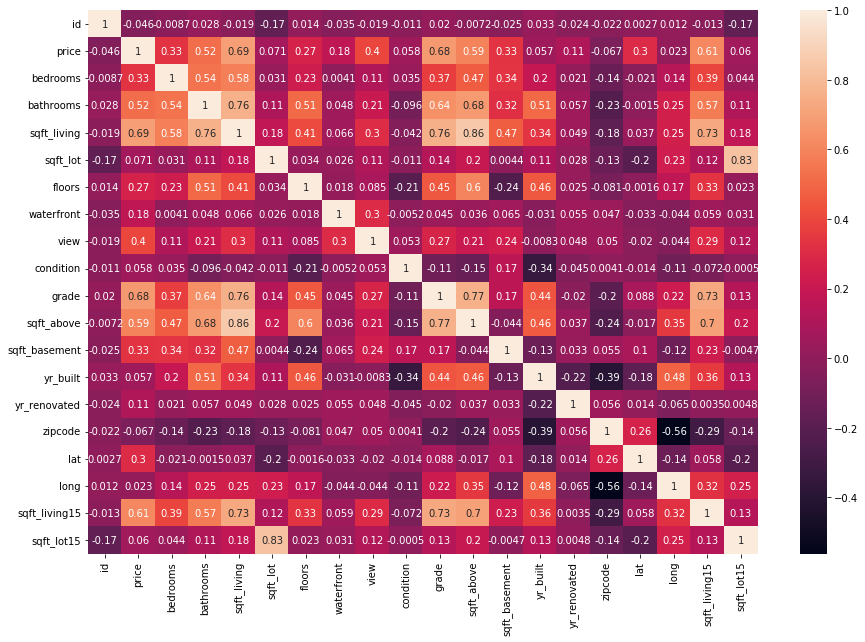

In [186]:
plt.figure(figsize = (15,10))
sns.heatmap(df.select_dtypes(include = np.number).corr(),annot = True)
# From this graph we can see how the variables are correlated with each other
# by removing variables as done in forward slection resulted in capturing less variance and high rmse

# Concluding that the price of the house is predicted base on the no.of bedrooms,batrooms,squarefeet of living area,
# no.of floors and year built 
# Based on the above parameters the price will be varied either increased, decreased or remains same

In [188]:
#(3)

# In the base model we have neither standardised the data nor the parameters are tuned
# In standard Scalar method the data is normalised and the model is performed resulting in high r2 score and less rmse
# Followed by Elastic net model where the data has been hypertuned resulted in high r2 score and less rmse
# The elastic net model is used for regularization
# Resulting to avoid overfit model and giving less rmse
# We have not considered only significant variables
# because all the variables here are significant
# If we remove any variables the rmse is been increased and r2 score is reducing as observed in SGD regressor and 
#Forward Selection
# The changes done through STandard Scalar and ELastic Net has improved the accuracy of the model from base model

In [ ]:
#(4)

# The key risks to our results and interpretation are
# Outliers
# Normality of errors
# Independent
# Linearity

# Outliers :- The outliers are not treated here howevere if we treat outliers we may miss the important information
# If we are not treating the outliers the model given scores may not be accurate

# Noramlity of errors :- We Assume that the residual error are normal in nature
# We are not peforming any check for the normality of errors

# Independent :- We assume that the variables are independent of each other that means which don't have any relation among
# themseleves

# Lineraity :- We assume that there is a linear relationship with respect to the target variable and performed regression
# sccording to our assumption